In [1]:
import numpy as np

In [4]:
#!pip install wfdb
import wfdb
import matplotlib.pyplot as plt

In [8]:
data_path = '../data/sudden-cardiac-death-holter-database-1.0.0/'

In [11]:
# ECG 데이터와 주석 파일 로드
record = wfdb.rdrecord(data_path + '30')  # 100번 기록을 예로 사용 (MIT-BIH Arrhythmia Database)
annotation = wfdb.rdann(data_path +'30', 'atr')  # 'atr'은 주석 파일의 확장자

In [14]:
# 데이터 정보 출력
print('Sampling frequency:', record.fs)
print('Number of channels:', record.n_sig)
print('Signal length:', record.sig_len)

Sampling frequency: 250
Number of channels: 2
Signal length: 22099250


In [15]:
# 주석 정보 출력
print('Annotation sample indices:', annotation.sample)
print('Annotation symbols:', annotation.symbol)

Annotation sample indices: [       4    17500    17502 ... 21599352 21599528 21599706]
Annotation symbols: ['~', '~', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '|', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '|', 'N', '|', '|', 'N', 'N', 'N', 'V', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '|', 'N', 'N', 'N', 'N', 'N', 'N', 'N

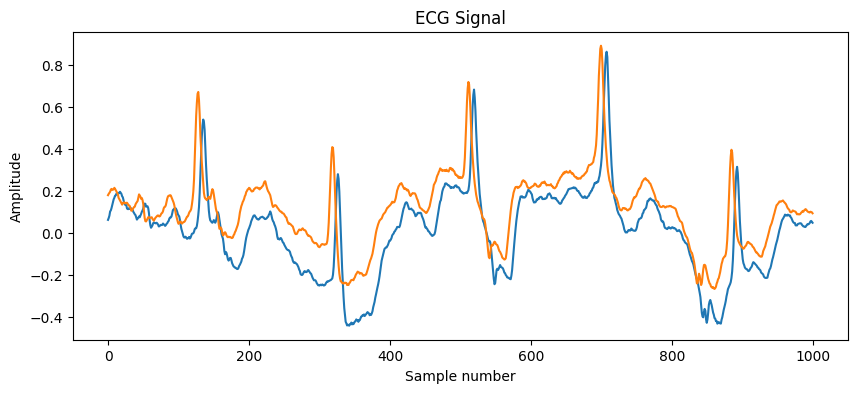

In [16]:
# ECG 데이터 시각화
plt.figure(figsize=(10, 4))
plt.plot(record.p_signal[:1000])  # 처음 1000개의 데이터 포인트를 플롯
plt.title('ECG Signal')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.show()

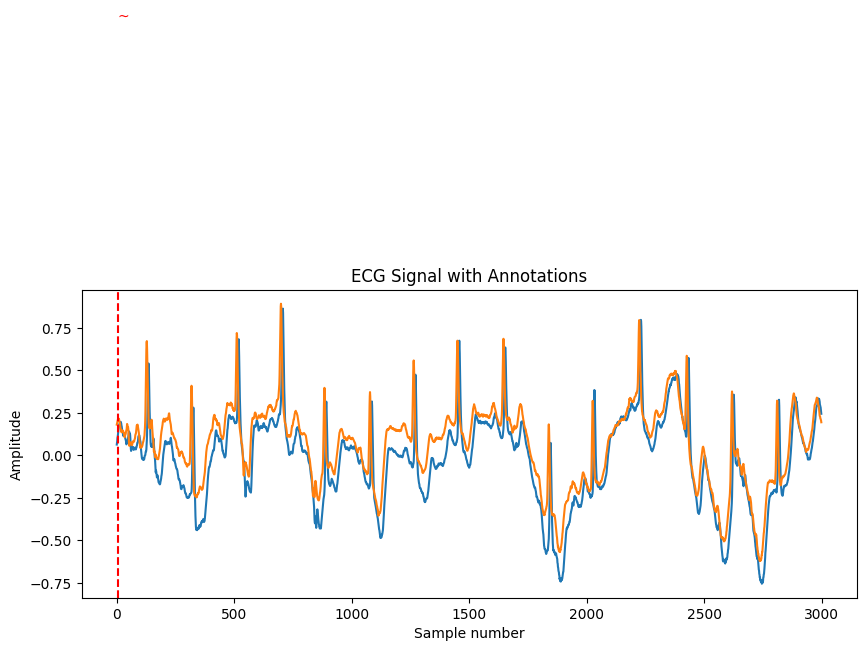

In [17]:
# 주석 시각화
plt.figure(figsize=(10, 4))
plt.plot(record.p_signal[:3000])  # 처음 3000개의 데이터 포인트를 플롯
for ann_sample, ann_symbol in zip(annotation.sample, annotation.symbol):
    if ann_sample < 3000:  # 처음 3000개의 주석만 플롯
        plt.axvline(x=ann_sample, color='r', linestyle='--')
        plt.text(ann_sample, max(record.p_signal[:, 0]), ann_symbol, color='red')
plt.title('ECG Signal with Annotations')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.show()

In [18]:
# 시간 문자열을 초로 변환하는 함수
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

In [13]:
annotation

In [20]:
# 총 길이와 VF 시작 시간 (초 단위로 변환)
total_duration_str = '24:33:17'
vf_start_time_str = '07:54:33'
total_duration = time_to_seconds(total_duration_str)
vf_start_time = time_to_seconds(vf_start_time_str)

# VF 시작 지점의 샘플 번호
vf_start_sample = vf_start_time * record.fs

In [21]:
vf_start_sample

7118250

### VF Signal

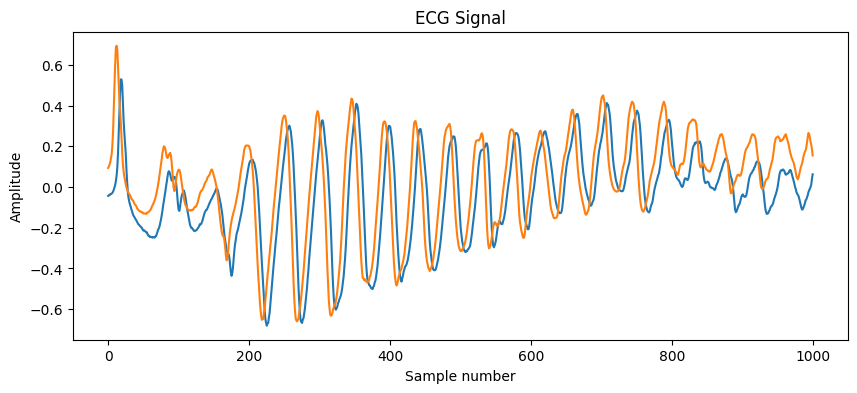

In [22]:
# ECG 데이터 시각화
plt.figure(figsize=(10, 4))
plt.plot(record.p_signal[vf_start_sample:vf_start_sample+1000])  # 처음 1000개의 데이터 포인트를 플롯
plt.title('ECG Signal')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.show()

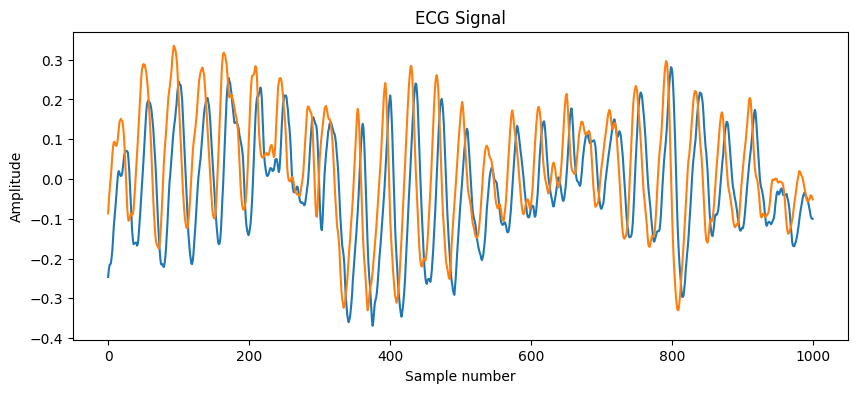

In [26]:
# ECG 데이터 시각화
plt.figure(figsize=(10, 4))
plt.plot(record.p_signal[vf_start_sample+3000:vf_start_sample+3000+1000])  # 처음 1000개의 데이터 포인트를 플롯
plt.title('ECG Signal')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
'../data/sudden-cardiac-death-holter-database-1.0.0/30.ari